# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

A análise detalhada de dados são fundamentais para qualquer instituição bancária que deseja melhorar seu relacionamento com os clientes, oferecer produtos mais relevantes e gerir riscos de forma eficiente. Quanto mais informações disponíveis permite uma visão holística dos clientes, possibilitando decisões mais estratégicas e eficazes em todas as áreas do banco.


## Etapa 2 Crisp-DM: Entendimento dos dados
Este banco de dados contém informações detalhadas sobre os clientes de uma instituição bancária, proporcionando uma visão abrangente de diversos aspectos sociodemográficos e financeiros. As tabelas estão estruturadas para armazenar dados relevantes que podem ser utilizados para análises e insights aprofundados.

Esta ferramenta é poderosa para a análise de perfil dos clientes, permitindo ao banco realizar segmentações, identificar padrões e comportamentos, e tomar decisões mais informadas sobre serviços e produtos financeiros personalizados. Além disso, pode ser utilizado para modelar risco de crédito, prever tendências e desenvolver estratégias de marketing direcionadas.

### Dicionário de dados

| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência de coleta das variáveis         | object|
| id_cliente              |   Código identificador exclusivo do cliente         | int64|
| sexo                    |  Sexo do cliente                                    | object|
| posse_de_veiculo        |  Indica se o cliente possui veículo                 | bool|
| posse_de_imovel         |  Indica se o cliente possui imóvel                  | bool|
| qtd_filhos              |  Quantidade de filhos do cliente                    | int64|
| tipo_renda              |  Tipo de renda do cliente                           | object|
| educacao                |  Grau de instrução do cliente                       | object|
| estado_civil            |  Estado civil do cliente                            | object|
| tipo_residencia         |  Tipo de residência do cliente (própria, alugada etc)| object|
| idade                   |  Idade do cliente                                   | int64|
| tempo_emprego           |  Tempo no emprego atual                             | float64|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência      | float64|
| renda                   |  Renda em reais                                     | float64|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport
import os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

%matplotlib inline

#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

In [2]:
renda = pd.read_csv('https://raw.githubusercontent.com/Jefersonfranca/EBAC_Curso_Cientista_de_Dados/main/M%C3%B3dulo%2013%20Regress%C3%A3o%20II/database/previsao_de_renda.csv', index_col=0)

In [3]:
renda.info()
renda.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usage: 1

data_ref  id_cliente sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0  2015-01-01       15056    F             False             True           0   
1  2015-01-01        9968    M              True             True           0   
2  2015-01-01        4312    F              True             True           0   
3  2015-01-01       10639    F             False             True           1   
4  2015-01-01        7064    M              True            False           0   

         tipo_renda           educacao estado_civil tipo_residencia  idade  \
0        Empresário         Secundário     Solteiro            Casa     26   
1       Assalariado  Superior completo       Casado            Casa     28   
2        Empresário  Superior completo       Casado            Casa     35   
3  Servidor público  Superior completo       Casado            Casa     30   
4       Assalariado         Secundário     Solteiro   Governamental     33   

   tempo_emprego  qt_pessoas_residencia    renda  
0       6.602740                    1.0  8060.34  
1       7.183562                    2.0  1852.15  
2       0.838356                    2.0  2253.89  
3       4.846575                    3.0  6600.77  
4       4.293151                    1.0  6475.97

#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

In [4]:
prof = ProfileReport(renda)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


### Análise Univariada dos Dados do Dataframe

A análise univariada inicial revelou que algumas variáveis do dataframe não são úteis e serão removidas na etapa de limpeza dos dados. Ao mesmo tempo, essa análise destacou a importância de outras variáveis.

Variáveis como **Unnamed: 0**, **data\_ref** e **id\_cliente** não contribuem para a obtenção de insights significativos e, portanto, serão descartadas. Por outro lado, as demais variáveis apresentam potencial para fornecer informações valiosas e merecem uma análise mais aprofundada.

Já no alerta mostrou três variáveis que devem ser analisadas se serão ou não removidas na etapa de limpeza.

### Entendimento dos dados - Bivariadas




In [6]:
renda.describe().transpose()

count         mean          std         min  \
id_cliente             15000.0  8304.871400  4797.780446    1.000000   
qtd_filhos             15000.0     0.432333     0.746631    0.000000   
idade                  15000.0    43.882333    11.273155   22.000000   
tempo_emprego          12427.0     7.722635     6.711189    0.117808   
qt_pessoas_residencia  15000.0     2.206400     0.909792    1.000000   
renda                  15000.0  5697.287057  8266.816289  118.710000   

                               25%          50%           75%            max  
id_cliente             4181.000000  8297.000000  12403.000000   16649.000000  
qtd_filhos                0.000000     0.000000      1.000000      14.000000  
idade                    34.000000    43.000000     53.000000      68.000000  
tempo_emprego             2.973973     6.013699     10.120548      42.906849  
qt_pessoas_residencia     2.000000     2.000000      3.000000      15.000000  
renda                  2026.110000  3499.720000   6392.167500  245141.670000

C:\Users\Xam_j\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


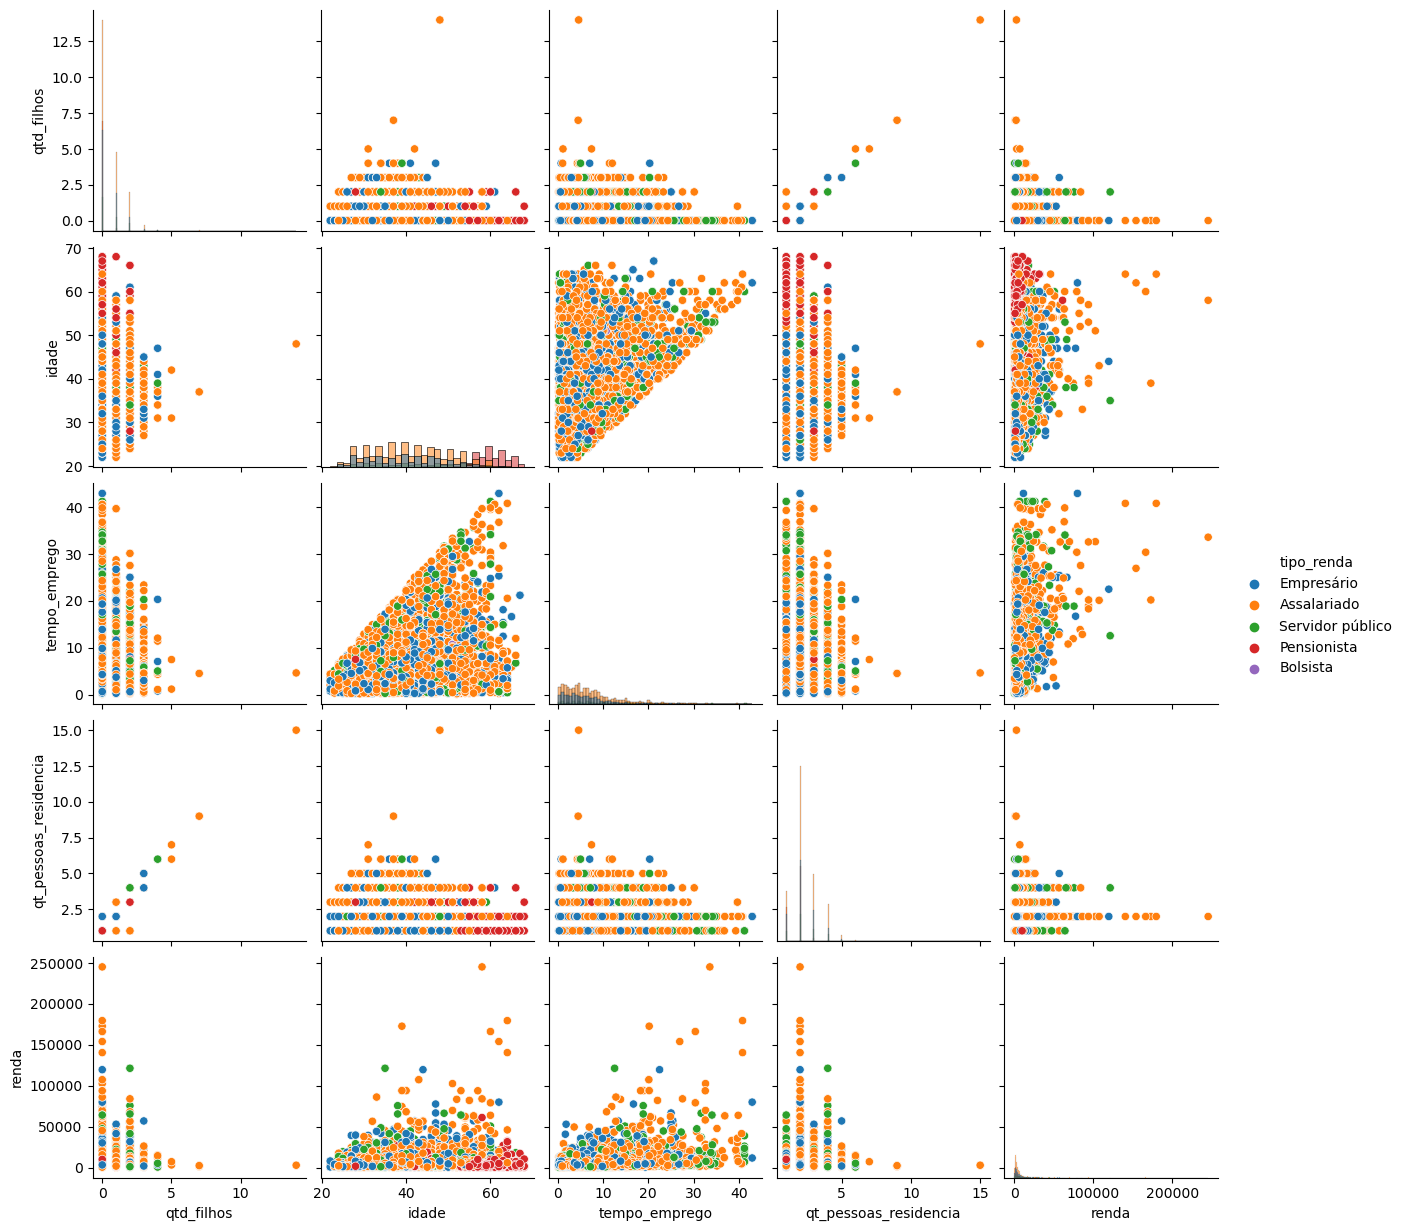

In [7]:
sns.pairplot(data=renda, 
             hue='tipo_renda', 
             vars=['qtd_filhos', 
                   'idade', 
                   'tempo_emprego', 
                   'qt_pessoas_residencia', 
                   'renda'], 
             diag_kind='hist')

plt.show()

Ao analisar o pairplot, que consiste na matriz de dispersão, é possível identificar alguns outliers na variável renda, os quais podem afetar o resultado da análise de tendência, apesar de ocorrerem com baixa frequência. Além disso, é observada uma baixa correlação entre praticamente todas as variáveis quantitativas.


C:\Users\Xam_j\AppData\Local\Temp\ipykernel_11776\1625946663.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda_['sexo'] = renda_.sexo.map({'F': 1, 'M':0})


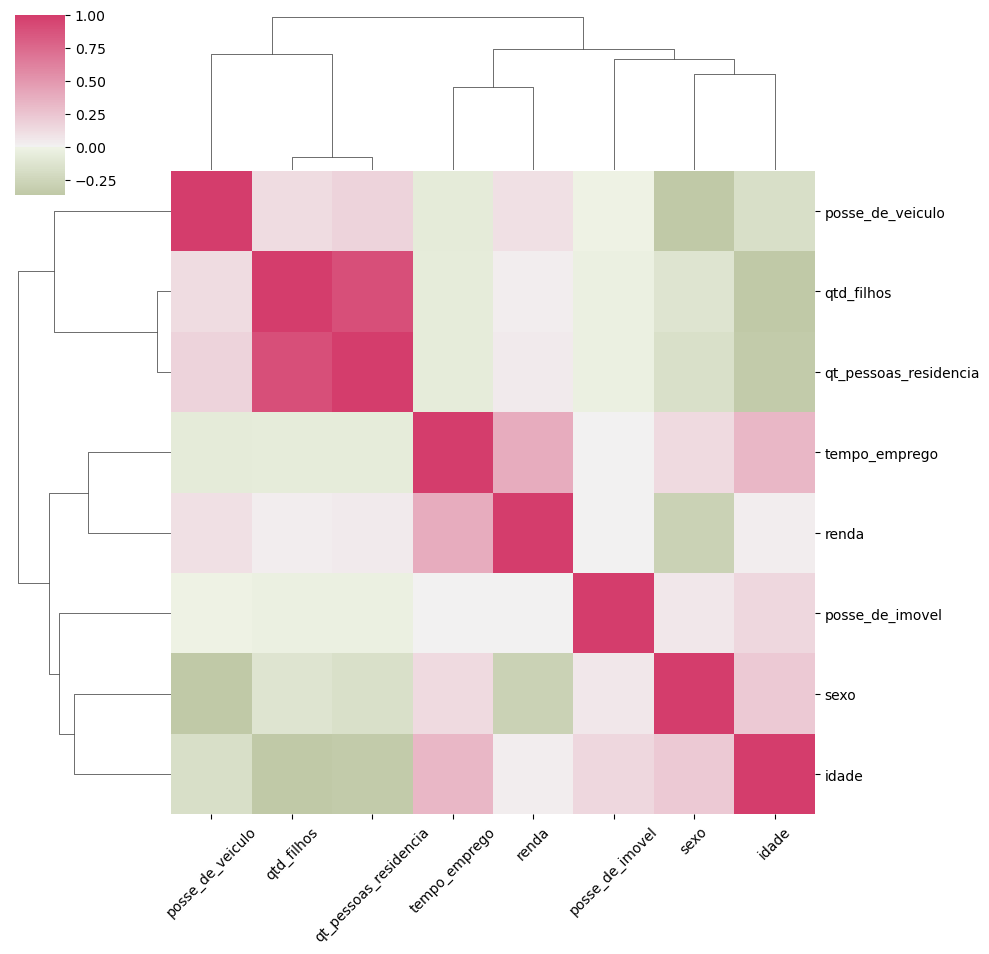

In [8]:
renda_ = renda[['sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'renda']]
renda_['sexo'] = renda_.sexo.map({'F': 1, 'M':0})
cmap = sns.diverging_palette(h_neg=100, 
                             h_pos=359, 
                             as_cmap=True, 
                             sep=1, 
                             center = 'light')

ax = sns.clustermap(data=renda_.corr(), 
               figsize=(10, 10), 
               center=0, 
               cmap=cmap)
plt.setp(ax.ax_heatmap.get_xticklabels(), rotation=45)

plt.show()

Com o *clustermap*, é possível reforçar novamente os resultados de baixa correlação com a variável `renda`. Apenas a variável `tempo_emprego` apresenta um índice considerável para análise. Além disso, foram apresentadas duas variáveis booleanas, `posse_de_imovel` e `posse_de_veiculo`, mas que também possuem baixo índice de correlação com renda.

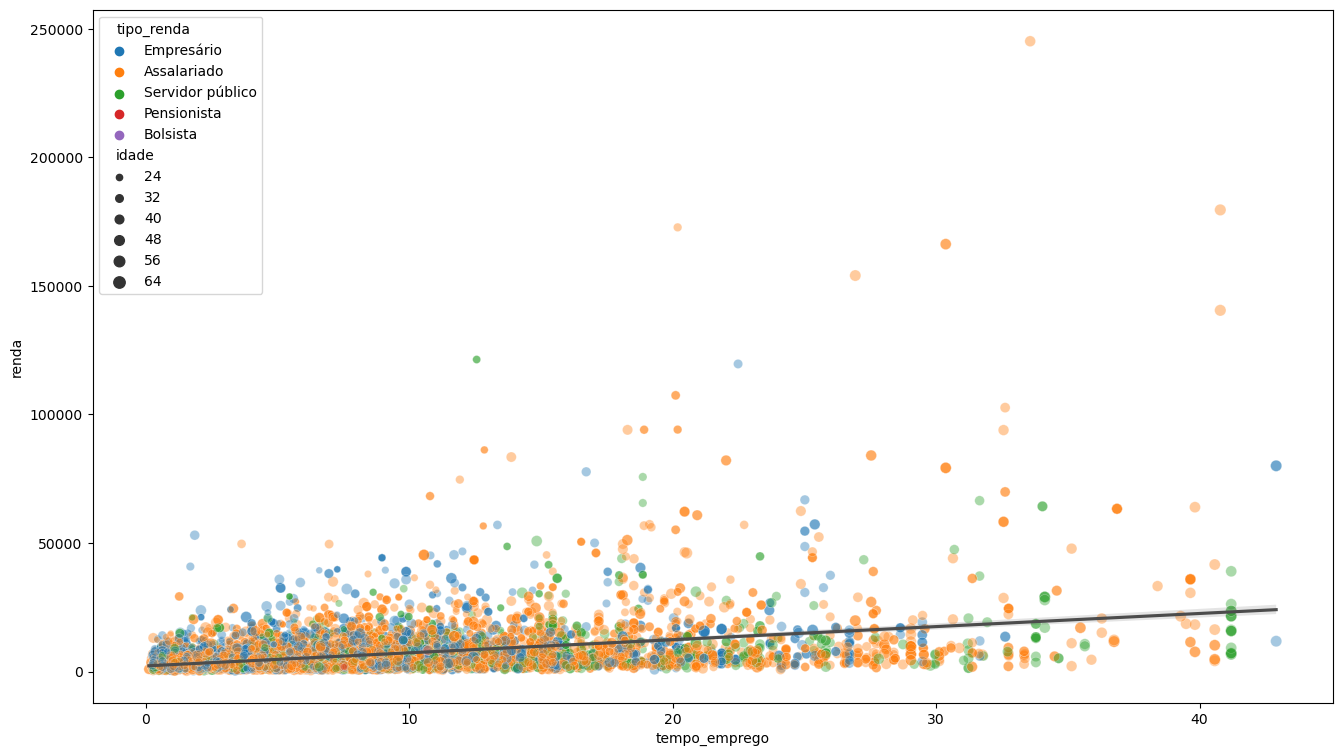

In [9]:
plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',
                y='renda', 
                hue='tipo_renda', 
                size='idade',
                data=renda,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=renda, 
            scatter=False, 
            color='.3')

plt.show()

Embora a correlação entre a variável tempo_emprego e a variável renda não seja tão alta, é possível identificar facilmente a covariância positiva com a inclinação da linha de tendência.

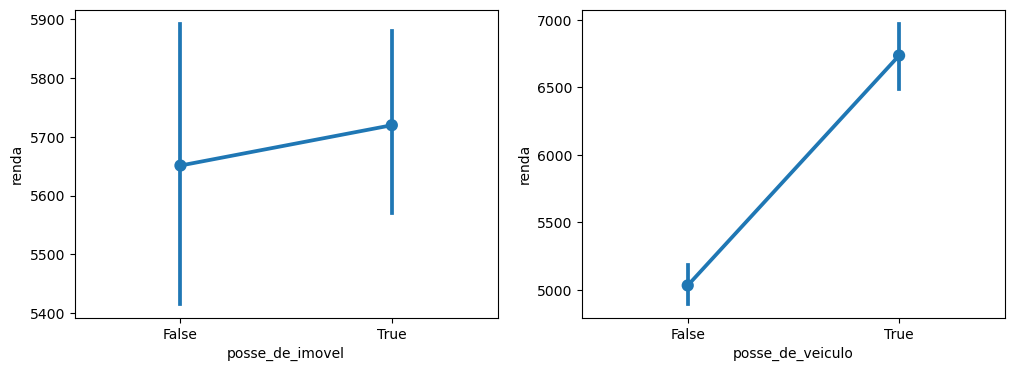

In [10]:
plt.rc('figure', figsize=(12,4))
fig, axes = plt.subplots(nrows=1, ncols=2)

sns.pointplot(x='posse_de_imovel', 
              y='renda',  
              data=renda, 
              dodge=True, 
              ax=axes[0])

sns.pointplot(x='posse_de_veiculo', 
              y='renda', 
              data=renda, 
              dodge=True, 
              ax=axes[1])

plt.show()

Ao comparar os gráficos acima, nota-se que a variável posse_de_veículo apresenta maior relevância na predição de renda, evidenciada pela maior distância entre os intervalos de confiança para aqueles que possuem e não possuem veículo, ao contrário da variável posse_de_imóvel que não apresenta diferença significativa entre as possíveis condições de posse imobiliária.

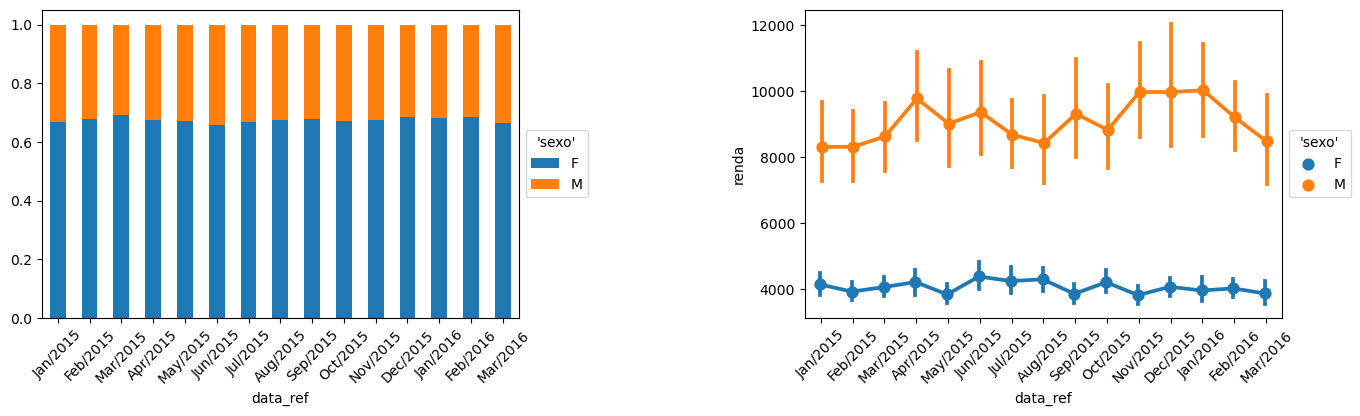

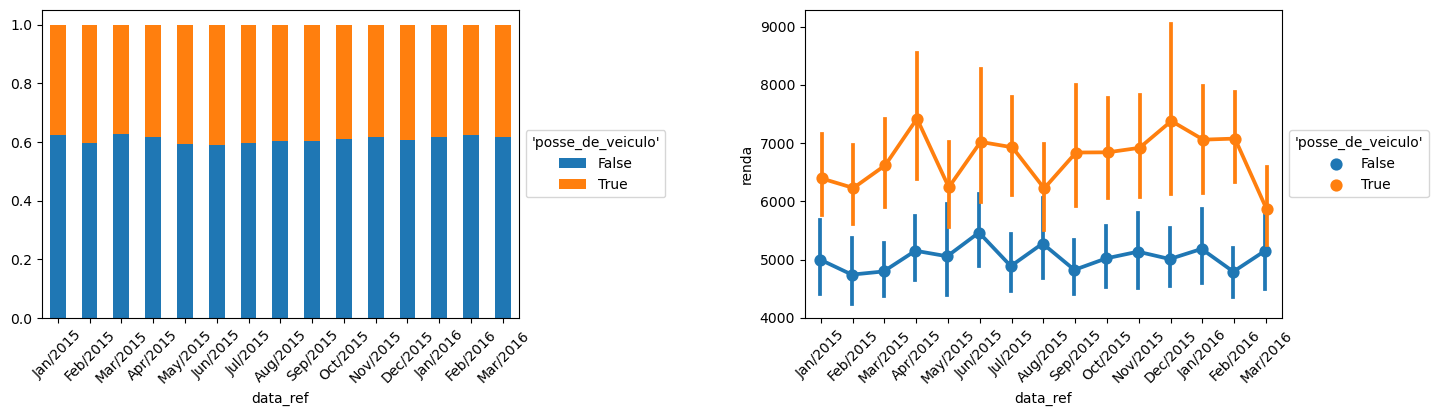

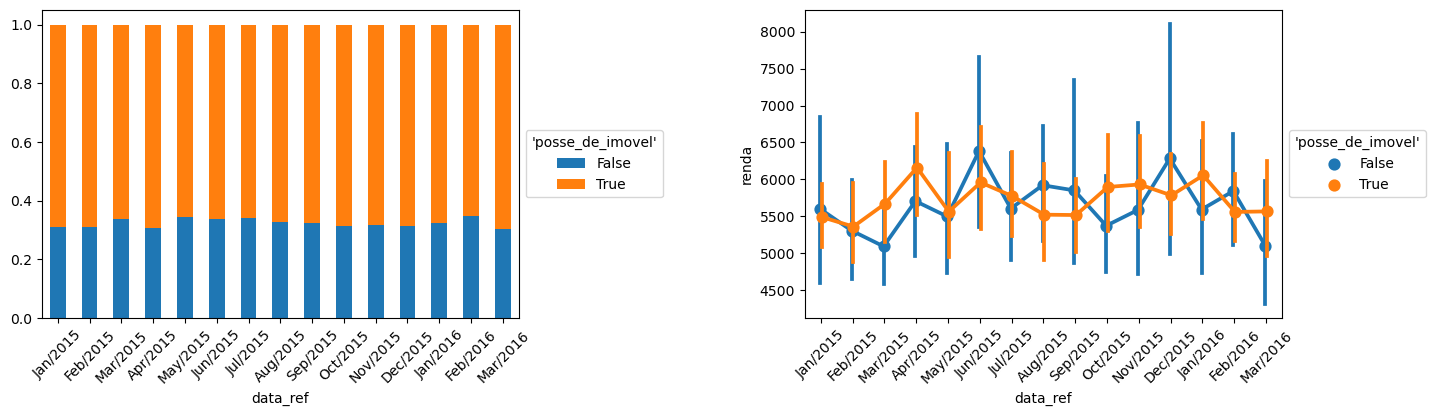

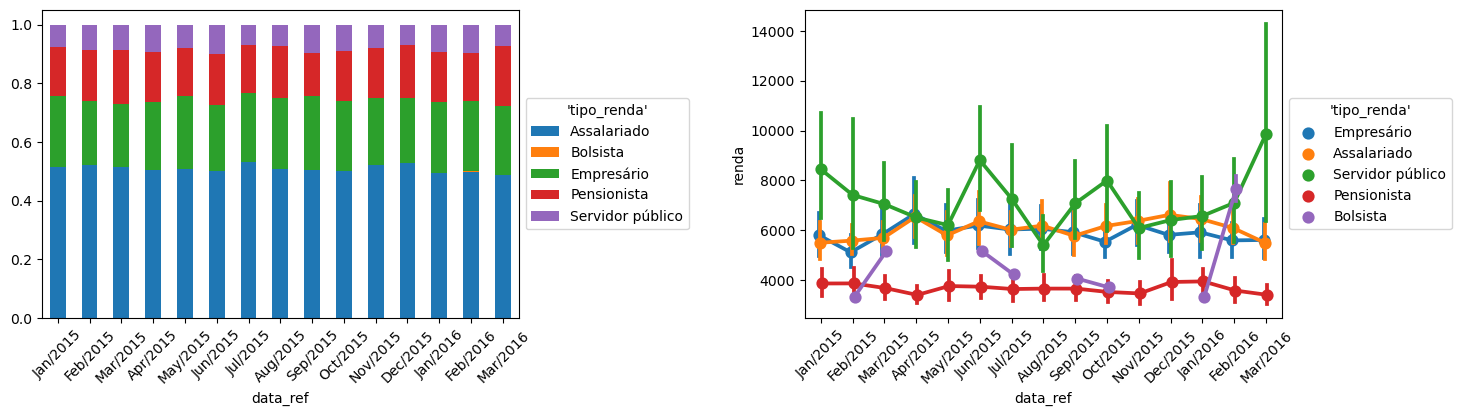

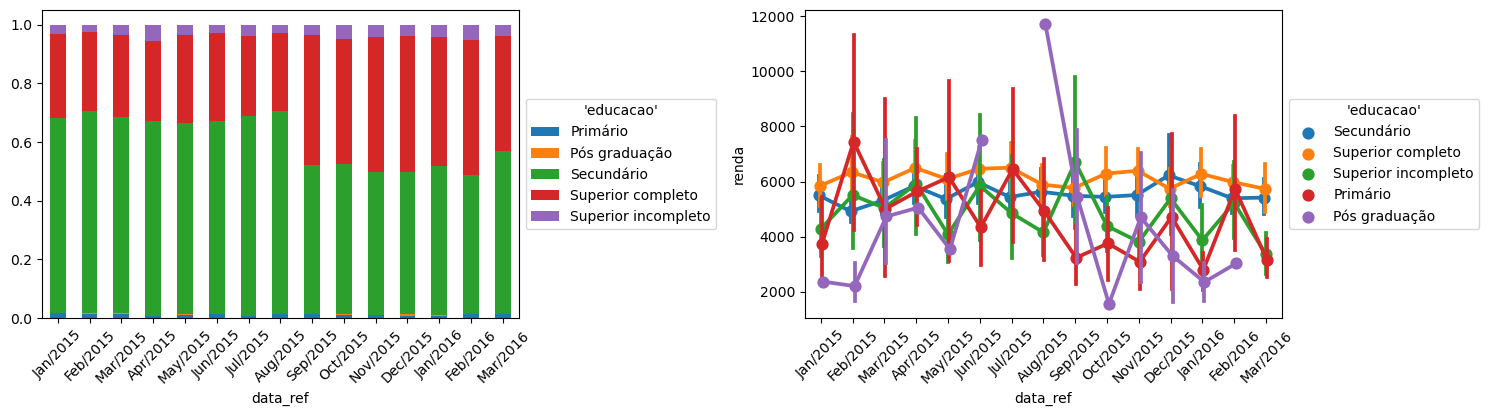

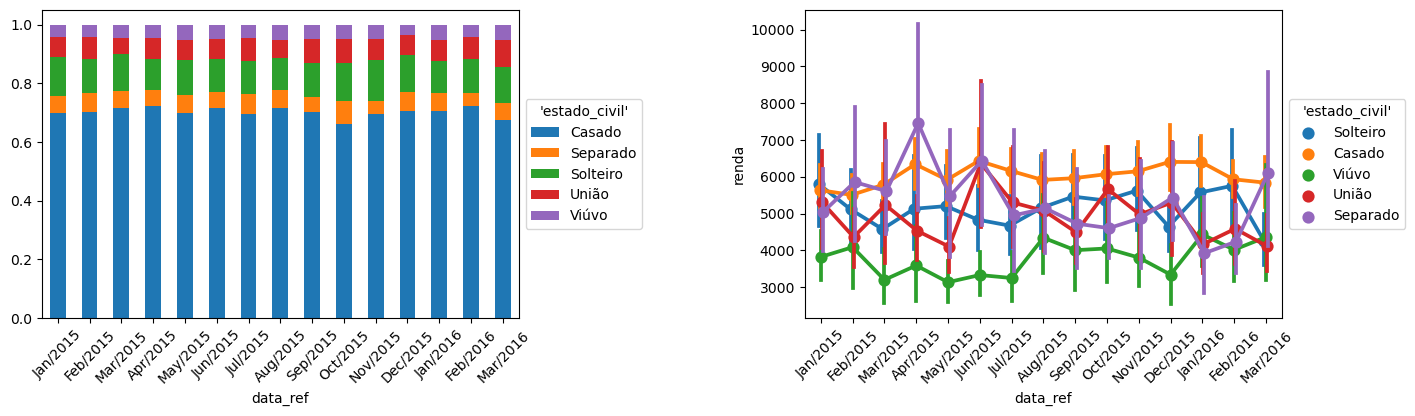

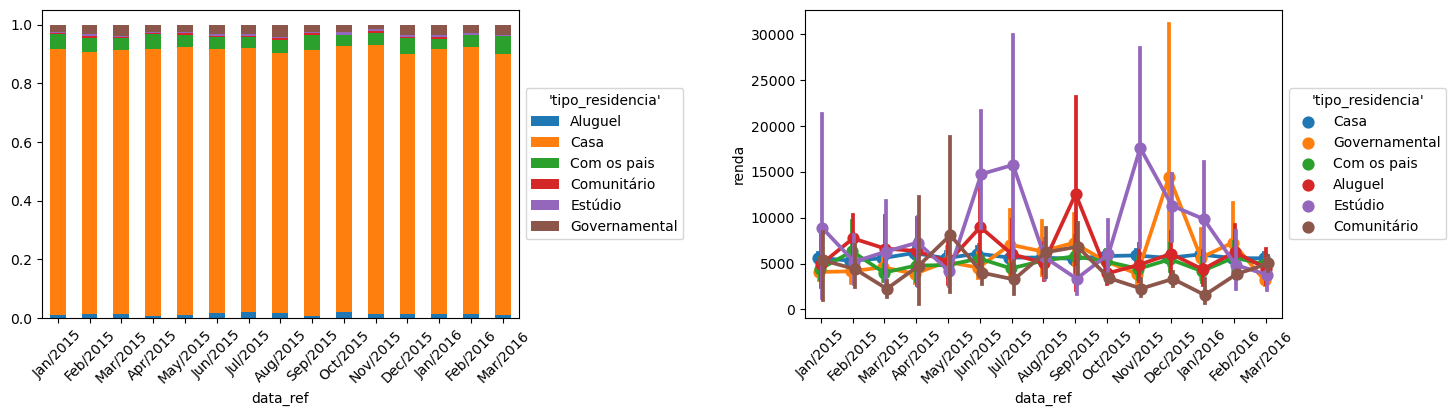

In [11]:
renda['data_ref'] = pd.to_datetime(arg=renda['data_ref'])

qualitativas = renda.select_dtypes(include=['object', 'boolean']).columns

plt.rc('figure', figsize=(16,4))

for col in qualitativas:
    fig, axes = plt.subplots(nrows=1, ncols=2)
    fig.subplots_adjust(wspace=.6)
    
    tick_labels = renda['data_ref'].map(lambda x: x.strftime('%b/%Y')).unique()
    
    # barras empilhadas:
    renda_crosstab = pd.crosstab(index=renda['data_ref'], 
                                 columns=renda[col], 
                                 normalize='index')
    ax0 = renda_crosstab.plot.bar(stacked=True, 
                                  ax=axes[0])
    ax0.set_xticklabels(labels=tick_labels, rotation=45)
    axes[0].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    # perfis médios no tempo: 
    ax1 = sns.pointplot(x='data_ref', y='renda', hue=col, data=renda, dodge=True, errorbar=('ci', 95), ax=axes[1])
    ax1.set_xticklabels(labels=tick_labels, rotation=45)
    axes[1].legend(bbox_to_anchor=(1, .5), loc=6, title=f"'{col}'")
    
    plt.show()

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



In [12]:
# Seleção dos dados adequados
renda.drop(columns='data_ref', inplace=True)
renda.dropna(inplace=True)

pd.DataFrame(index=renda.nunique().index, 
             data={'tipos_dados': renda.dtypes, 
                   'qtd_valores': renda.notna().sum(), 
                   'qtd_categorias': renda.nunique().values})

tipos_dados  qtd_valores  qtd_categorias
id_cliente                  int64        12427            8161
sexo                       object        12427               2
posse_de_veiculo             bool        12427               2
posse_de_imovel              bool        12427               2
qtd_filhos                  int64        12427               8
tipo_renda                 object        12427               5
educacao                   object        12427               5
estado_civil               object        12427               5
tipo_residencia            object        12427               6
idade                       int64        12427              46
tempo_emprego             float64        12427            2589
qt_pessoas_residencia     float64        12427               9
renda                     float64        12427            8126

In [13]:
# Conversão das variáveis categóricas em variáveis numéricas (dummies)
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     12427 non-null  int64  
 1   posse_de_veiculo               12427 non-null  bool   
 2   posse_de_imovel                12427 non-null  bool   
 3   qtd_filhos                     12427 non-null  int64  
 4   idade                          12427 non-null  int64  
 5   tempo_emprego                  12427 non-null  float64
 6   qt_pessoas_residencia          12427 non-null  float64
 7   renda                          12427 non-null  float64
 8   sexo_F                         12427 non-null  bool   
 9   sexo_M                         12427 non-null  bool   
 10  tipo_renda_Assalariado         12427 non-null  bool   
 11  tipo_renda_Bolsista            12427 non-null  bool   
 12  tipo_renda_Empresário          12427 non-null  bool

In [14]:
renda['sexo'] = renda.sexo.map({'F': 1, 'M':0})
renda.sexo.unique()

array([1, 0], dtype=int64)

In [15]:
renda_dummies = pd.get_dummies(data=renda)
renda_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12427 entries, 0 to 14999
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id_cliente                     12427 non-null  int64  
 1   sexo                           12427 non-null  int64  
 2   posse_de_veiculo               12427 non-null  bool   
 3   posse_de_imovel                12427 non-null  bool   
 4   qtd_filhos                     12427 non-null  int64  
 5   idade                          12427 non-null  int64  
 6   tempo_emprego                  12427 non-null  float64
 7   qt_pessoas_residencia          12427 non-null  float64
 8   renda                          12427 non-null  float64
 9   tipo_renda_Assalariado         12427 non-null  bool   
 10  tipo_renda_Bolsista            12427 non-null  bool   
 11  tipo_renda_Empresário          12427 non-null  bool   
 12  tipo_renda_Pensionista         12427 non-null  bool

In [16]:
(renda_dummies.corr()['renda']
              .sort_values(ascending=False)
              .to_frame()
              .reset_index()
              .rename(columns={'index':'var', 
                               'renda':'corr'})
              .style.bar(color=['darkred', 'darkgreen'], align=0)
)

In [17]:
renda = renda.drop_duplicates()
renda.reset_index(drop=True, inplace=True)
print(renda.shape)
renda.head(60)



(8655, 13)


id_cliente  sexo  posse_de_veiculo  posse_de_imovel  qtd_filhos  \
0        15056     1             False             True           0   
1         9968     0              True             True           0   
2         4312     1              True             True           0   
3        10639     1             False             True           1   
4         7064     0              True            False           0   
5        10581     1             False             True           0   
6         7129     1             False             True           0   
7         9952     1             False             True           0   
8          883     1             False             True           0   
9         8070     0              True             True           0   
10        2221     0             False            False           0   
11       12517     1              True            False           0   
12        1268     0              True             True           0   
13        7249     0              True             True           1   
14        5551     1             False            False           0   
15        6573     1              True             True           0   
16       10667     0              True             True           1   
17       11760     0             False             True           0   
18       12200     0              True             True           1   
19        1853     0              True             True           1   
20       16032     0              True             True           2   
21       10295     1              True             True           0   
22        1912     1             False             True           1   
23         785     1             False             True           1   
24        2514     1             False             True           0   
25       10508     0             False             True           0   
26        6106     0              True             True           1   
27        6539     1             False             True           0   
28       15235     1             False             True           0   
29        5785     0             False             True           0   
30        2103     1             False             True           0   
31        4457     1             False            False           0   
32        1667     1              True             True           1   
33        1044     1              True             True           1   
34        1851     1             False             True           2   
35       13066     1             False             True           0   
36        7153     1             False             True           0   
37       14973     1              True             True           2   
38          66     0             False             True           0   
39         557     1              True             True           1   
40        6386     0              True            False           2   
41        8323     1              True             True           0   
42          81     1             False             True           2   
43        4985     0             False            False           0   
44       12416     1             False             True           0   
45         605     0              True             True           2   
46        4991     1              True             True           0   
47        6932     1             False            False           0   
48        2731     0             False             True           0   
49        4311     1              True             True           0   
50         650     1             False             True           0   
51        6834     1              True             True           1   
52       11068     1             False             True           1   
53        2937     0             False             True           0   
54         962     1              True            False           1   
55        9300     1        

## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:
- Selecionar a técnica de modelagem
- Desenho do teste
- Avaliação do modelo


A técnica de modelagem que pretendo utilizar é a Árvores de Decisão: Podem ser usadas tanto para regressão quanto para classificação. São interpretáveis e podem capturar relações não lineares.


In [18]:
X = renda_dummies.drop(columns='renda')
y = renda_dummies['renda']

print('Quantidade de linhas e colunas de X:', X.shape)
print('Quantidade de linhas de y:', len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

Quantidade de linhas e colunas de X: (12427, 29)
Quantidade de linhas de y: 12427
X_train: (9320, 29)
X_test: (3107, 29)
y_train: (9320,)
y_test: (3107,)


In [19]:
score = pd.DataFrame(columns=['max_depth', 'min_samples_leaf', 'score'])

for x in range(1, 21):
    for y in range(1, 31):
        reg_tree = DecisionTreeRegressor(random_state=42, 
                                         max_depth=x, 
                                         min_samples_leaf=y)
        reg_tree.fit(X_train, y_train)
        
        score = pd.concat(objs=[score, 
                                pd.DataFrame({'max_depth': [x], 
                                              'min_samples_leaf': [y], 
                                              'score': [reg_tree.score(X=X_test, 
                                                                       y=y_test)]})], 
                          axis=0, 
                          ignore_index=True)
        
score.sort_values(by='score', ascending=False)

max_depth min_samples_leaf     score
241         9                2  0.409270
127         5                8  0.406639
122         5                3  0.404892
541        19                2  0.404637
137         5               18  0.404094
..        ...              ...       ...
7           1                8  0.101771
27          1               28  0.101771
6           1                7  0.101771
28          1               29  0.101771
0           1                1  0.101771

[600 rows x 3 columns]

### Rodando o modelo


In [20]:
reg_tree = DecisionTreeRegressor(random_state=42, max_depth=8, min_samples_leaf=4)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=4, random_state=42)

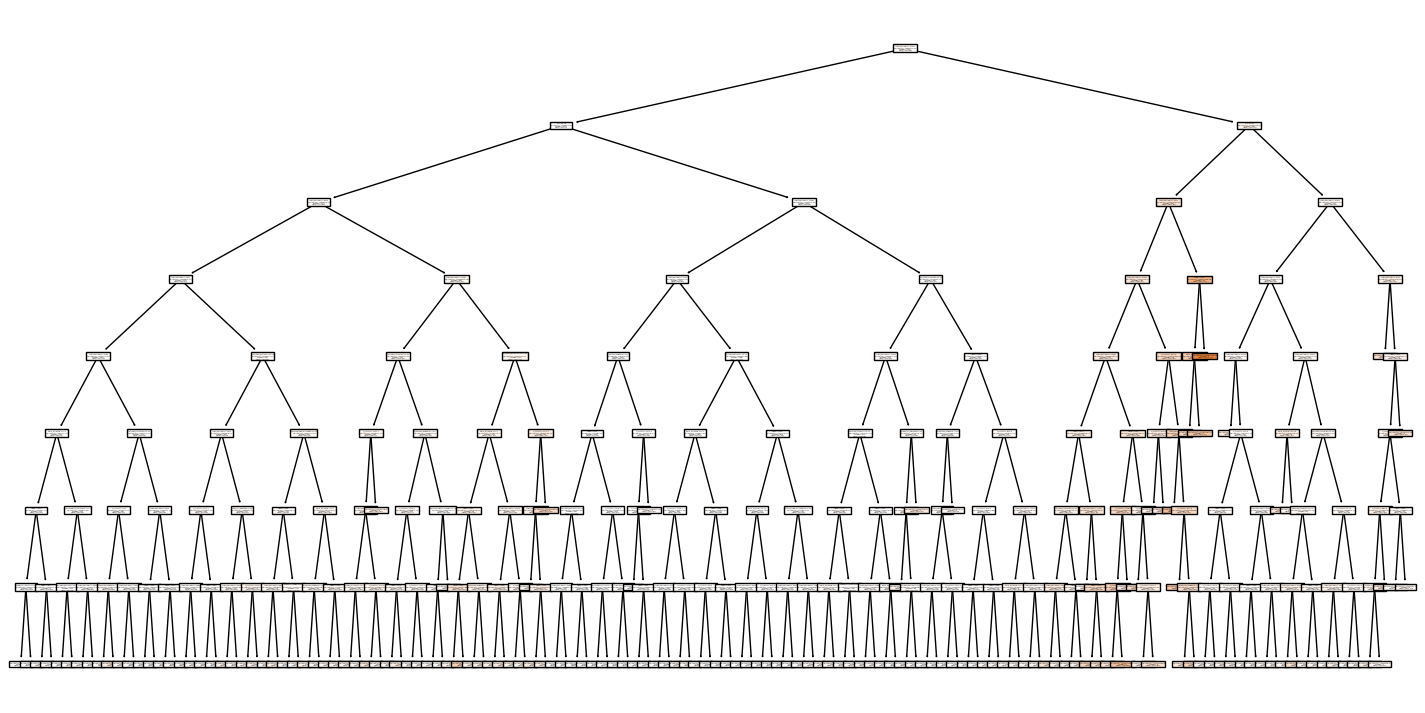

In [21]:
plt.rc('figure', figsize=(18,9))

tp = tree.plot_tree(decision_tree=reg_tree, 
                    feature_names=X.columns.tolist(),  # Converte para lista
                    filled=True)

In [22]:
text_tree_print = tree.export_text(decision_tree=reg_tree)

print(text_tree_print)

|--- feature_6 <= 17.01
|   |--- feature_1 <= 0.50
|   |   |--- feature_6 <= 8.27
|   |   |   |--- feature_6 <= 4.54
|   |   |   |   |--- feature_6 <= 1.26
|   |   |   |   |   |--- feature_3 <= 0.50
|   |   |   |   |   |   |--- feature_5 <= 54.00
|   |   |   |   |   |   |   |--- feature_18 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [3556.82]
|   |   |   |   |   |   |   |--- feature_18 >  0.50
|   |   |   |   |   |   |   |   |--- value: [2684.98]
|   |   |   |   |   |   |--- feature_5 >  54.00
|   |   |   |   |   |   |   |--- feature_5 <= 60.00
|   |   |   |   |   |   |   |   |--- value: [7767.08]
|   |   |   |   |   |   |   |--- feature_5 >  60.00
|   |   |   |   |   |   |   |   |--- value: [4065.28]
|   |   |   |   |   |--- feature_3 >  0.50
|   |   |   |   |   |   |--- feature_25 <= 0.50
|   |   |   |   |   |   |   |--- feature_10 <= 0.50
|   |   |   |   |   |   |   |   |--- value: [3480.61]
|   |   |   |   |   |   |   |--- feature_10 >  0.50
|   |   |   |   |   |   |   |   

## Etapa 5 Crisp-DM: Avaliação dos resultados


In [23]:
r2_train = reg_tree.score(X=X_train, y=y_train)
r2_test = reg_tree.score(X=X_test, y=y_test)

template = 'O coeficiente de determinação 𝑅² da árvore com profundidade = {0} para a base de {1} é: {2:.2f}'

print(template.format(reg_tree.get_depth(), 'treino', r2_train).replace(".", ","))
print(template.format(reg_tree.get_depth(), 'teste', r2_test).replace(".", ","), '\n')

O coeficiente de determinação 𝑅² da árvore com profundidade = 8 para a base de treino é: 0,64
O coeficiente de determinação 𝑅² da árvore com profundidade = 8 para a base de teste é: 0,35 



In [24]:
# Verifique o número de linhas em X e renda
print(f"Tamanho de X: {X.shape[0]}")
print(f"Tamanho de renda: {renda.shape[0]}")

# Se houver um filtro ou condição nos dados, aplique-o consistentemente
# Exemplo de alinhamento (assumindo que há um filtro para alinhar os dados)

X_aligned = X.iloc[renda.index]

# Verifique se os tamanhos agora correspondem
print(f"Tamanho de X_aligned: {X_aligned.shape[0]}")
print(f"Tamanho de renda: {renda.shape[0]}")

# Faça a previsão usando os dados alinhados
renda['renda_predict'] = np.round(reg_tree.predict(X_aligned), 2)

# Verifique as previsões
print(renda[['renda', 'renda_predict']])


Tamanho de X: 12427
Tamanho de renda: 8655
Tamanho de X_aligned: 8655
Tamanho de renda: 8655
         renda  renda_predict
0      8060.34        2281.78
1      1852.15        7949.24
2      2253.89        3127.13
3      6600.77        3296.07
4      6475.97        5425.56
...        ...            ...
8650  15702.40        5069.88
8651   1918.14        3173.17
8652    604.82        2519.28
8653   3352.27        3920.30
8654   1160.99       10690.37

[8655 rows x 2 columns]


C:\Users\Xam_j\AppData\Local\Temp\ipykernel_11776\4145392625.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['renda_predict'] = np.round(reg_tree.predict(X_aligned), 2)


In [25]:
renda['renda_predict'] = np.round(reg_tree.predict(X_aligned), 2)
renda[['renda', 'renda_predict']]

C:\Users\Xam_j\AppData\Local\Temp\ipykernel_11776\528789993.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  renda['renda_predict'] = np.round(reg_tree.predict(X_aligned), 2)


renda  renda_predict
0      8060.34        2281.78
1      1852.15        7949.24
2      2253.89        3127.13
3      6600.77        3296.07
4      6475.97        5425.56
...        ...            ...
8650  15702.40        5069.88
8651   1918.14        3173.17
8652    604.82        2519.28
8653   3352.27        3920.30
8654   1160.99       10690.37

[8655 rows x 2 columns]

In [ ]:
renda['renda_predict'] = np.round(reg_tree.predict(X), 2)
renda[['renda', 'renda_predict']]

## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.

In [26]:
entrada = pd.DataFrame([{'sexo': 0, 
                         'posse_de_veiculo': False, 
                         'posse_de_imovel': True, 
                         'qtd_filhos': 1, 
                         'tipo_renda': 'Assalariado', 
                         'educacao': 'Superior completo', 
                         'estado_civil': 'Solteiro', 
                         'tipo_residencia': 'Casa', 
                         'idade': 34, 
                         'tempo_emprego': None, 
                         'qt_pessoas_residencia': 1}])
entrada = pd.concat([X, pd.get_dummies(entrada)]).fillna(value=0).tail(1)
print(f"Renda estimada: R${str(np.round(reg_tree.predict(entrada).item(), 2)).replace('.', ',')}")

Renda estimada: R$3480,61
